Parse lentiMPRA data into format for training distilled models with mean+aleatoric+epistemic prediction.

Add the standard deviation of the ensemble predictions (epistemic uncertainty) for the activity output to the .h5 file containing the mean and aleatoric uncertainty (`/home/jessica/ensemble_distillation/data/lentiMPRA/{celltype}_data_with_aleatoric.h5`).

Also add the mean of the ensemble predictions for the activity and aleatoric uncertainty outputs for the training set to the .h5 file.

[Data source](https://www.biorxiv.org/content/10.1101/2023.03.05.531189v1.supplementary-material)
- Sequences: Supplementary Table 3
- Target values: Supplementary Table 4 (summary level data, mean column)

In [21]:
import h5py 
import pandas as pd
import numpy as np
np.random.seed(1234)
import sys
sys.path.append("../code")
from utils import load_lentiMPRA_data
from os.path import join
import matplotlib.pyplot as plt

In [2]:
data_dir="../data/lentiMPRA"

# K562

## Load data w/ aleatoric std 
Adding distillation data to this file.

In [4]:
celltype = 'K562'

In [6]:
X_train, y_train, X_test, y_test, X_val, y_val = load_lentiMPRA_data(join(data_dir, f'{celltype}_data_with_aleatoric.h5'))

In [28]:
assert(y_train.shape[-1]==2)
assert(y_test.shape[-1]==2)
assert(y_val.shape[-1]==2)

## Load epistemic std data

- col0 = ensemble std of mean
- col1 = ensemble std of aleatoric uncertainty

In [12]:
epistemic_train = np.load(join(data_dir, f'{celltype}_ensemble_std_train.npy'))
epistemic_test = np.load(join(data_dir, f'{celltype}_ensemble_std_test.npy'))
epistemic_val = np.load(join(data_dir, f'{celltype}_ensemble_std_val.npy'))

In [13]:
# check dims 
assert(epistemic_train.shape[0]==y_train.shape[0])
assert(epistemic_test.shape[0]==y_test.shape[0])
assert(epistemic_val.shape[0]==y_val.shape[0])

## Load ensemble avg on train set

Average should be computed from ensemble of models w/ activity+aleatoric outputs.

In [17]:
ensemble_avg_y_train = np.load(f'../results/lentiMPRA_aleatoric/{celltype}/ensemble_avg_y_train.npy')
assert(ensemble_avg_y_train.shape[-1]==2)

### Visualize ensemble avg against ground truth data

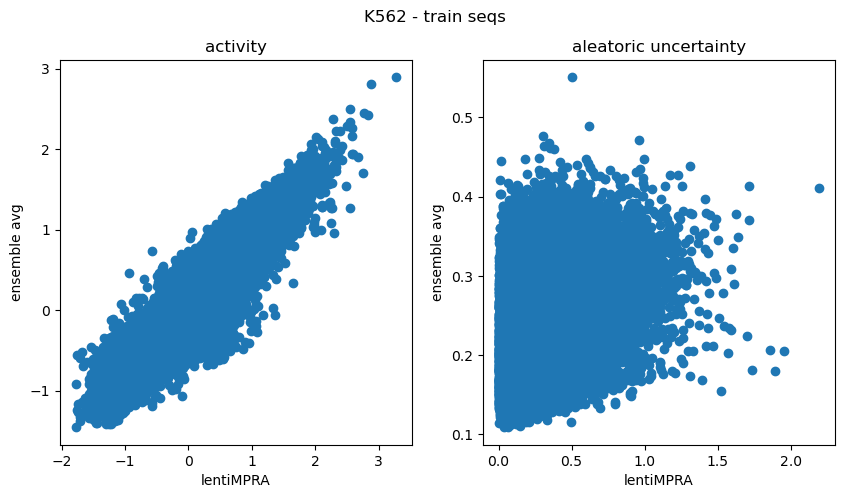

In [32]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(10,5))
ax1.scatter(y_train[:,0], ensemble_avg_y_train[:,0])
ax1.set_xlabel('lentiMPRA')
ax1.set_ylabel('ensemble avg')
ax1.set_title('activity')
ax2.scatter(y_train[:,1], ensemble_avg_y_train[:,1])
ax2.set_xlabel('lentiMPRA')
ax2.set_ylabel('ensemble avg')
ax2.set_title('aleatoric uncertainty')
f.suptitle(f'{celltype} - train seqs')
plt.show()

# Update train/test/val data 
For distilling lentiMPRA models w/ mean+aleatoric+epistemic.

In [38]:
distill_y_train = np.hstack((ensemble_avg_y_train, epistemic_train))
distill_y_test = np.hstack((y_test, epistemic_test))
distill_y_val = np.hstack((y_val, epistemic_val))

## Write data to h5 file

In [34]:
with h5py.File(f"{data_dir}/{celltype}_distillation_data_with_epistemic.h5", 'w') as file:
    # train
    train = file.create_group("Train")
    train.create_dataset('X', data=X_train)
    train.create_dataset('y', data=distill_y_train)

    # test 
    test = file.create_group('Test')
    test.create_dataset('X', data=X_test)
    test.create_dataset('y', data=distill_y_test)

    # val
    val = file.create_group('Val')
    val.create_dataset('X', data = X_val)
    val.create_dataset('y', data=distill_y_val)

# HepG2

## Load data w/ aleatoric std
We will be adding the distillation data to this file

In [43]:
celltype = 'HepG2'

# load data w/ aleatoric std 
X_train, y_train, X_test, y_test, X_val, y_val = load_lentiMPRA_data(join(data_dir, f'{celltype}_data_with_aleatoric.h5'))

# check dims
assert(y_train.shape[-1]==2)
assert(y_test.shape[-1]==2)
assert(y_val.shape[-1]==2)

## Load epistemic std data

- col0 = ensemble std of mean
- col1 = ensemble std of aleatoric uncertainty

In [44]:
epistemic_train = np.load(join(data_dir, f'{celltype}_ensemble_std_train.npy'))
epistemic_test = np.load(join(data_dir, f'{celltype}_ensemble_std_test.npy'))
epistemic_val = np.load(join(data_dir, f'{celltype}_ensemble_std_val.npy'))

In [45]:
# check dims 
assert(epistemic_train.shape[0]==y_train.shape[0])
assert(epistemic_test.shape[0]==y_test.shape[0])
assert(epistemic_val.shape[0]==y_val.shape[0])

## Load ensemble avg on train set

Average should be computed from ensemble of models w/ activity+aleatoric outputs.

In [46]:
ensemble_avg_y_train = np.load(f'../results/lentiMPRA_aleatoric/{celltype}/ensemble_avg_y_train.npy')
assert(ensemble_avg_y_train.shape[-1]==2)

### Visualize ensemble avg against ground truth data

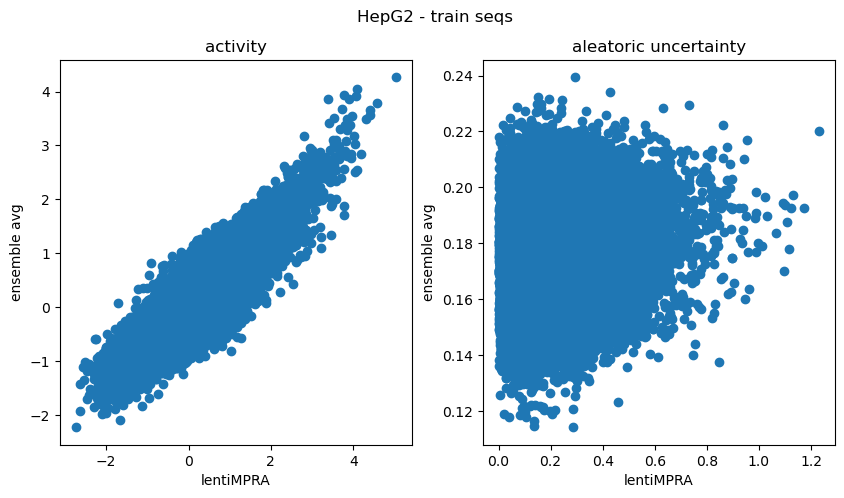

In [47]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(10,5))
ax1.scatter(y_train[:,0], ensemble_avg_y_train[:,0])
ax1.set_xlabel('lentiMPRA')
ax1.set_ylabel('ensemble avg')
ax1.set_title('activity')
ax2.scatter(y_train[:,1], ensemble_avg_y_train[:,1])
ax2.set_xlabel('lentiMPRA')
ax2.set_ylabel('ensemble avg')
ax2.set_title('aleatoric uncertainty')
f.suptitle(f'{celltype} - train seqs')
plt.show()

# Update train/test/val data 
For distilling lentiMPRA models w/ mean+aleatoric+epistemic.

In [48]:
distill_y_train = np.hstack((ensemble_avg_y_train, epistemic_train))
distill_y_test = np.hstack((y_test, epistemic_test))
distill_y_val = np.hstack((y_val, epistemic_val))

## Write data to h5 file

In [49]:
with h5py.File(f"{data_dir}/{celltype}_distillation_data_with_epistemic.h5", 'w') as file:
    # train
    train = file.create_group("Train")
    train.create_dataset('X', data=X_train)
    train.create_dataset('y', data=distill_y_train)

    # test 
    test = file.create_group('Test')
    test.create_dataset('X', data=X_test)
    test.create_dataset('y', data=distill_y_test)

    # val
    val = file.create_group('Val')
    val.create_dataset('X', data = X_val)
    val.create_dataset('y', data=distill_y_val)